<a href="https://colab.research.google.com/github/AkangkhaMitra/Writer_Identification_using_VGGModel/blob/main/Writer_Identification_using_VGGModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Upload The Datset**

In [ ]:
from google.colab import files

# Upload the dataset zip file
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

#**Extract The Dataset**

In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = "Segmented image _BD.zip"

# Extract the zip file
extracted_folder = "dataset"
os.makedirs(extracted_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# List folder names of every single writer individually
w = os.listdir(extracted_folder)
print("Folders for each writer:", w)

FileNotFoundError: [Errno 2] No such file or directory: 'Segmented image _BD.zip'

#**Importing packages**

In [ ]:
pip install --upgrade tensorflow

In [ ]:
pip install scikeras

In [ ]:
pip install tensorflow-io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 25.1 MB/s eta 0:00:00


In [ ]:
pip install --upgrade tensorflow keras

In [ ]:
# Importing packages
import os
import cv2
import glob
import math
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_io as tfio
from tensorflow.keras.models import Model  # Use tensorflow.keras for consistency
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import Constant
from sklearn.model_selection import cross_val_score
from tensorflow.keras.applications.vgg16 import VGG16
from scikeras.wrappers import KerasClassifier  # Updated import
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPool2D, AveragePooling2D, Dropout, PReLU


/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl8str_util8EndsWithESt17basic_string_viewIcSt11char_traitsIcEES4_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZN3tsl8str_util9LowercaseB5cxx11ESt17basic_s

#**Display Or checking the Images Of every person Folder**
**Train and Test Data Splitting**

In [ ]:
import os
import zipfile
import shutil
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow

# Path to the uploaded zip file
zip_file_path = "Segmented image _BD.zip"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("dataset/")

# Define train and test directories
train_dir = "Train"
test_dir = "Test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to split images into train and test sets
def split_data(file_list, train_size=0.8):
    train_files, test_files = train_test_split(file_list, train_size=train_size, random_state=42)
    return train_files, test_files

# Loop through folders named "1_1" to "150_20"
for i in range(1, 151):
    for j in range(1, 21):
        folder_name = f"dataset/{i}_{j}"
        if os.path.exists(folder_name):
            # List images named "1_1_1" to "50_20_30"
            image_files = [f for f in os.listdir(folder_name) if f.endswith(".jpg")]
            # Split images into training and testing sets
            train_files, test_files = split_data(image_files)

            # Create subdirectories for each folder in Train and Test directories
            train_person_dir = os.path.join(train_dir, f"{i}_{j}")
            test_person_dir = os.path.join(test_dir, f"{i}_{j}")
            os.makedirs(train_person_dir, exist_ok=True)
            os.makedirs(test_person_dir, exist_ok=True)

            # Copy and display images for training set
            for file_name in train_files:
                src = os.path.join(folder_name, file_name)
                dst = os.path.join(train_person_dir, file_name)
                shutil.copy2(src, dst)
                img = cv2.imread(src)
                if img is not None:
                    print(f"Displaying training image from {src}")
                    #cv2_imshow(img)

            # Copy and display images for testing set
            for file_name in test_files:
                src = os.path.join(folder_name, file_name)
                dst = os.path.join(test_person_dir, file_name)
                shutil.copy2(src, dst)
                img = cv2.imread(src)
                if img is not None:
                    print(f"Displaying testing image from {src}")
                    #cv2_imshow(img)
        else:
            print(f"Folder {folder_name} does not exist")


Streaming output truncated to the last 5000 lines.
Displaying training image from dataset/9_1/9_1_21.jpg
Displaying training image from dataset/9_1/9_1_19.jpg
Displaying training image from dataset/9_1/9_1_8.jpg
Displaying training image from dataset/9_1/9_1_10.jpg
Displaying training image from dataset/9_1/9_1_3.jpg
Displaying training image from dataset/9_1/9_1_12.jpg
Displaying testing image from dataset/9_1/9_1_11.jpg
Displaying testing image from dataset/9_1/9_1_1.jpg
Displaying testing image from dataset/9_1/9_1_20.jpg
Displaying testing image from dataset/9_1/9_1_16.jpg
Displaying testing image from dataset/9_1/9_1_7.jpg
Displaying training image from dataset/9_2/9_2_3.jpg
Displaying training image from dataset/9_2/9_2_11.jpg
Displaying training image from dataset/9_2/9_2_5.jpg
Displaying training image from dataset/9_2/9_2_4.jpg
Displaying training image from dataset/9_2/9_2_16.jpg
Displaying training image from dataset/9_2/9_2_2.jpg
Displaying training image from dataset/9_2/9

**Function to count the number of images in a directory and their corresponding labels**

In [ ]:
# Function to count the number of images in a directory and their corresponding labels
def dataset_statistics(data_dir):
    dataset_size = 0
    labels = []
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            image_count = len([f for f in os.listdir(folder_path) if f.endswith(".jpg")])
            dataset_size += image_count
            labels.append((folder, image_count))
    return dataset_size, labels

# Calculate sizes and labels for Train and Test datasets
train_size, train_labels = dataset_statistics(train_dir)
test_size, test_labels = dataset_statistics(test_dir)

# Display the statistics
print(f"Train Dataset Size: {train_size}")
print("Train Labels and Counts:")
for label, count in train_labels:
    print(f"  Label: {label}, Count: {count}")

print(f"\nTest Dataset Size: {test_size}")
print("Test Labels and Counts:")
for label, count in test_labels:
    print(f"  Label: {label}, Count: {count}")


Train Dataset Size: 3771
Train Labels and Counts:
  Label: 43_6, Count: 12
  Label: 48_3, Count: 20
  Label: 12_6, Count: 18
  Label: 36_1, Count: 22
  Label: 20_1, Count: 18
  Label: 13_1, Count: 20
  Label: 26_7, Count: 16
  Label: 50_2, Count: 13
  Label: 43_4, Count: 12
  Label: 30_2, Count: 20
  Label: 11_1, Count: 13
  Label: 21_1, Count: 19
  Label: 12_2, Count: 18
  Label: 38_2, Count: 17
  Label: 15_7, Count: 6
  Label: 50_1, Count: 12
  Label: 28_3, Count: 15
  Label: 43_8, Count: 13
  Label: 50_4, Count: 12
  Label: 43_12, Count: 12
  Label: 37_3, Count: 19
  Label: 12_5, Count: 18
  Label: 35_5, Count: 12
  Label: 37_5, Count: 17
  Label: 6_3, Count: 14
  Label: 14_2, Count: 24
  Label: 24_6, Count: 11
  Label: 31_5, Count: 14
  Label: 44_5, Count: 12
  Label: 10_5, Count: 19
  Label: 42_2, Count: 22
  Label: 44_1, Count: 12
  Label: 48_1, Count: 18
  Label: 19_2, Count: 16
  Label: 37_4, Count: 16
  Label: 33_5, Count: 12
  Label: 32_4, Count: 18
  Label: 9_3, Count: 17
  

**Size of the train and test dataset with corresponding labels**

3771
3771
1085
1085


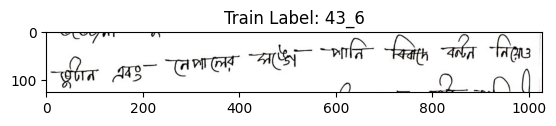

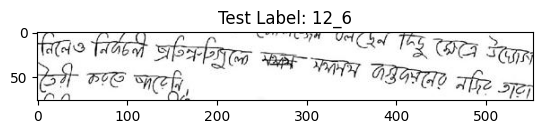

In [ ]:
# Size of the train and test dataset with corresponding labels
train_images = []
train_labels_list = []
test_images = []
test_labels_list = []

# Collect images and labels for the train dataset
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            if image_file.endswith(".jpg"):
                train_images.append(os.path.join(folder_path, image_file))
                train_labels_list.append(folder)

# Collect images and labels for the test dataset
for folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            if image_file.endswith(".jpg"):
                test_images.append(os.path.join(folder_path, image_file))
                test_labels_list.append(folder)

# Display the sizes
print(len(train_images))  # Total number of train images
print(len(train_labels_list))  # Total number of train labels
print(len(test_images))  # Total number of test images
print(len(test_labels_list))  # Total number of test labels

# Display sample images and labels
plt.imshow(cv2.cvtColor(cv2.imread(train_images[10]), cv2.COLOR_BGR2RGB))
plt.title(f"Train Label: {train_labels_list[10]}")
plt.show()

plt.imshow(cv2.cvtColor(cv2.imread(test_images[10]), cv2.COLOR_BGR2RGB))
plt.title(f"Test Label: {test_labels_list[10]}")
plt.show()


**Optional Train Set Download**

In [ ]:
import shutil
from google.colab import files  # Use this for Google Colab. For local systems, download is direct.

# Paths to train and test directories
output_zip = "Train.zip"  # Name of the zip file to create

# Create a zip file of the train and test data
shutil.make_archive("Train", 'zip', base_dir=".")  # Replace '.' with the parent directory of your train and test folders

# Download the zip file to the local system
files.download(output_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
from google.colab import files  # Use this for Google Colab. For local systems, download is direct.

# Paths to train and test directories
output_zip = "Test.zip"  # Name of the zip file to create

# Create a zip file of the train and test data
shutil.make_archive("Test", 'zip', base_dir=".")  # Replace '.' with the parent directory of your train and test folders

# Download the zip file to the local system
files.download(output_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Converting the train nd test dataset into Numpy Array**

Shape of train_images_np: (3771, 100, 1000, 3)
Shape of train_labels_np: (3771,)
Shape of test_images_np: (1085, 100, 1000, 3)
Shape of test_labels_np: (1085,)


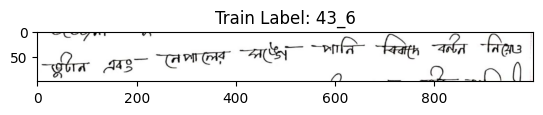

In [ ]:
# Define a fixed size for all images (e.g., 224x224)
fixed_size = (1000, 100)

# Converting the train dataset into a numpy array
train_images_np = np.array([
    cv2.resize(cv2.imread(img), fixed_size)
    for img in train_images
    if cv2.imread(img) is not None
])
train_labels_np = np.array([
    label
    for img, label in zip(train_images, train_labels_list)
    if cv2.imread(img) is not None
])

# Converting the test dataset into a numpy array
test_images_np = np.array([
    cv2.resize(cv2.imread(img), fixed_size)
    for img in test_images
    if cv2.imread(img) is not None
])
test_labels_np = np.array([
    label
    for img, label in zip(test_images, test_labels_list)
    if cv2.imread(img) is not None
])

# Display the shapes of the resulting NumPy arrays
print(f"Shape of train_images_np: {train_images_np.shape}")
print(f"Shape of train_labels_np: {train_labels_np.shape}")
print(f"Shape of test_images_np: {test_images_np.shape}")
print(f"Shape of test_labels_np: {test_labels_np.shape}")

# Example: Visualize a resized sample from the NumPy array
plt.imshow(cv2.cvtColor(train_images_np[10], cv2.COLOR_BGR2RGB))
plt.title(f"Train Label: {train_labels_np[10]}")
plt.show()


**The one-hot encoded labels**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical  # Updated import

# Initialize the LabelEncoder
y_labelencoder = LabelEncoder()

# Encode the labels for the train dataset
train_y = y_labelencoder.fit_transform(train_labels_list)
train_y = to_categorical(train_y, num_classes=len(set(train_labels_list)))

# Encode the labels for the test dataset
test_y = y_labelencoder.transform(test_labels_list)  # Using transform here to keep the same encoding
test_y = to_categorical(test_y, num_classes=len(set(train_labels_list)))

# Print the shapes of the one-hot encoded labels
print(f"Length of train_y: {len(train_y)}")
print(f"Length of test_y: {len(test_y)}")

Length of train_y: 3771
Length of test_y: 1085


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1_l2

# Define the image dimensions (height, width, channels)
IMG_H, IMG_W, IMG_C = 1000, 100, 3  # Adjusted for your fixed size (1000x100)

input = tf.keras.Input(shape=(IMG_H, IMG_W, IMG_C))

# Load the VGG16 model without the top layers (using imagenet weights)
vgg = VGG16(include_top=False, weights='imagenet', input_tensor=input)

# VGG16 Model summary (Excluding top layers)
vgg.summary()

# Freeze the layers of the VGG16 model to retain its weights
for layer in vgg.layers:
    layer.trainable = False

# Modify the classification part of the model and add L1 and L2 regularization
model = Sequential()
model.add(vgg)
model.add(GlobalAveragePooling2D())
model.add(Flatten())

# First dense layer with L1 and L2 regularization
model.add(Dense(256, activation='relu',
                kernel_regularizer=l1_l2(l1=1e-5, l2=1e-5),
                bias_regularizer=l1_l2(l1=1e-5, l2=1e-5),
                activity_regularizer=l1_l2(l1=1e-5, l2=1e-5)))

model.add(Dropout(0.5))

# Second dense layer with L1 and L2 regularization
model.add(Dense(256, activation='relu',
                kernel_regularizer=l1_l2(l1=1e-5, l2=1e-5),
                bias_regularizer=l1_l2(l1=1e-5, l2=1e-5),
                activity_regularizer=l1_l2(l1=1e-5, l2=1e-5)))

model.add(Dropout(0.5))

# Output layer with the softmax activation for multi-class classification
model.add(Dense(count, activation='softmax'))

# Model summary
model.summary()

# Early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Adam optimizer with a learning rate of 0.001
op = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1000, 100, 3)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 1000, 100, 64)       │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 1000, 100, 64)       │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 500, 50, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 500, 50, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 500, 50, 128)        │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 250, 25, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 250, 25, 256)        │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 250, 25, 256)        │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 250, 25, 256)        │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 125, 12, 256)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 125, 12, 512)        │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 125, 12, 512)        │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 125, 12, 512)        │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 62, 6, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 62, 6, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 62, 6, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 62, 6, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 31, 3, 512)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 31, 3, 512)          │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,912,836 (56.89 MB)

 Trainable params: 198,148 (774.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
import cv2
import numpy as np
import json

# Define the function to load and resize images
def load_and_resize_images(image_paths, size=(1000, 100)):
    """
    Load and resize images to the specified size.

    Args:
        image_paths (list): List of image file paths.
        size (tuple): Target size (width, height).

    Returns:
        np.array: Array of resized images.
    """
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)  # Read the image
        if img is None:
            print(f"Warning: Unable to load image at {img_path}. Skipping...")
            continue
        img = cv2.resize(img, size)  # Resize the image to (width, height)
        images.append(img)
    return np.array(images)

# Load and preprocess training images
train_images_resized = load_and_resize_images(train_images, size=(1000, 100))  # Resizing to (1000, 100)
if train_images_resized.ndim == 4:  # Check if images have correct dimensions
    train_images_resized = np.transpose(train_images_resized, (0, 2, 1, 3))  # Transpose to (batch, height, width, channels)
else:
    raise ValueError("train_images_resized does not have the expected dimensions (batch, height, width, channels).")

# Load and preprocess testing images
test_images_resized = load_and_resize_images(test_images, size=(1000, 100))
if test_images_resized.ndim == 4:
    test_images_resized = np.transpose(test_images_resized, (0, 2, 1, 3))
else:
    raise ValueError("test_images_resized does not have the expected dimensions (batch, height, width, channels).")

# Train the model
history = model.fit(
    train_images_resized,    # Resized training images
    train_y,                 # One-hot encoded training labels
    batch_size=100,          # Batch size
    epochs=300,              # Number of epochs
    validation_data=(test_images_resized, test_y),  # Validation dataset
    verbose=1,               # Verbosity level
    callbacks=[callback]     # Early stopping callback
)

# Save the training history to a JSON file
history_dict = history.history
with open('training_history.json', 'w') as f:
    json.dump(history_dict, f)

# Print a success message
print("Training complete. History saved to 'training_history.json'.")


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 1000, 100, 3))
  warnings.warn(msg)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1842s 49s/step - accuracy: 0.0051 - loss: 9.8198 - val_accuracy: 0.0286 - val_loss: 5.6020
Epoch 2/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 1840s 49s/step - accuracy: 0.0119 - loss: 5.6003 - val_accuracy: 0.0544 - val_loss: 5.4732
Epoch 3/300
36/38 ━━━━━━━━━━━━━━━━━━━━ 1:15 38s/step - accuracy: 0.0319 - loss: 5.4528